### LSE - Sophia Velicer

# Course 3 Assignment 

Turtle Games, a game manufacturer and retailer with a global customer base that manufactures and sells its own products, along with sourcing and selling products manufactured by other companies. Its product range includes books, board games, video games, and toys.
As part of a team of data analysts that was contracted by Turtle Games, I am trying to improve overall sales performance by utilising customer trends.  

To improve overall sales performance, Turtle Games has come up with an initial set of questions. You’ll explore these questions in greater depth through the weekly assignment activities. Turtle Games wants to understand: 

- how customers accumulate loyalty points
- how groups within the customer base can be used to target specific market segments 
- how social data (e.g. customer reviews) can be used to inform marketing campaigns
- the impact that each product has on sales
- how reliable the data is (e.g. normal distribution, skewness, or kurtosis)
- what the relationship(s) is/are (if any) between North American, European, and global sales? 

#### Week 1

Using a multiple linear regression, we will first investigate the possible relationships between the loyalty points, age, remuneration, and spending scores to determine which factors impact sales most significantly. 

In [51]:
import statsmodels.api as sm
from sklearn import datasets 
import numpy as np
from sklearn import linear_model
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Note: Indicates situations that aren’t necessarily exceptions.
import warnings  
warnings.filterwarnings('ignore')  

In [2]:
df = pd.read_csv('turtle_reviews.csv')

print(df.shape)
df.head()

(2000, 11)


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Check for missing values
df.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
df.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [6]:
tr = df.drop(['language','platform'], axis = 1)
tr.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [20]:
# Rename the columns.
tr_new = tr.rename(columns = {'remuneration (k£)': 'remuneration', 
                             'spending_score (1-100)':'spending_score'})
tr_new.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [21]:
tr_new.to_csv('turtle_reviews_clean.csv', index = False)

In [22]:
trc = pd.read_csv('turtle_reviews_clean.csv')

trc.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [23]:
y = trc['spending_score']
x = trc[['age', 'remuneration', 'loyalty_points']]

In [25]:
mlr = linear_model.LinearRegression()
mlr.fit(x, y) 

LinearRegression()

In [26]:
mlr.predict(x)

array([ 54.22836127,  59.28120225,  48.53201887, ..., 106.63693994,
         3.38464415,  -4.02645555])

In [27]:
# Split the data into 80-20 to fit the model.
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,
                                                                           test_size = 0.2,
                                                                           random_state = 42)


In [28]:
# Create the statsmodel' OLS model.
# Fit the model with the constant to account for the intercept.
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector.
y_pred = model.predict(sm.add_constant(x_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model) 

                            OLS Regression Results                            
Dep. Variable:         spending_score   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     1624.
Date:                Mon, 24 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:55:16   Log-Likelihood:                -6363.1
No. Observations:                1600   AIC:                         1.273e+04
Df Residuals:                    1596   BIC:                         1.276e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             65.2774      1.197     54.

In [29]:
# Check for multicollinearity. 
x_temp = sm.add_constant(x_train)  

vif = pd.DataFrame() 

# Calculate the 'vif' for each value.
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, 
                                               i) for i in range(x_temp.values.shape[1])]  

vif['features'] = x_temp.columns  

# Print the values to two decimal points.
print(vif.round(2))  

   VIF Factor        features
0       13.72           const
1        1.00             age
2        1.65    remuneration
3        1.66  loyalty_points


##### Plot age v spending score.

In [30]:
x_age = trc['age'].values.reshape(-1, 1)  
y = trc['spending_score'].values.reshape(-1, 1)  

lr = LinearRegression()
lr.fit(x_age,y)
print("Intercept value: ", lr.intercept_) 

print("Coefficient value: ", lr.coef_)

Intercept value:  [67.03364202]
Coefficient value:  [[-0.43128604]]


In [ ]:
y_pred = (lr.intercept_ + lr.coef_) * x

Text(0, 0.5, 'Spending Score')

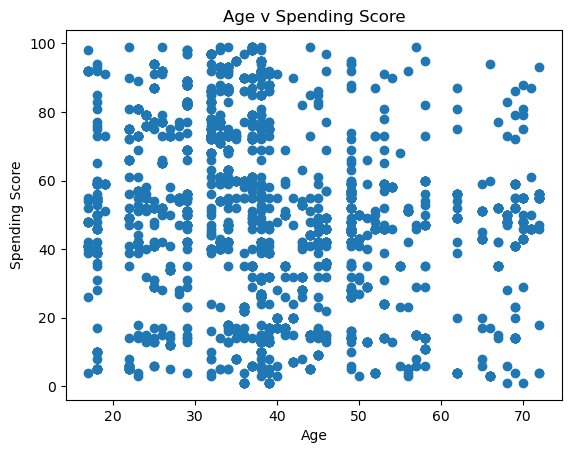

In [33]:
# Draw the scatterplot using Matplotlib. 
plt.scatter(x_age, y) 


plt.title('Age v Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')


##### Remuneration v Spending Score


In [43]:
x_rem = trc['remuneration'].values.reshape(-1, 1)  
y = trc['spending_score'].values.reshape(-1, 1)  

lr = LinearRegression()
lr.fit(x_rem,y)
print("Intercept value: ", lr.intercept_) 

print("Coefficient value: ", lr.coef_)

Intercept value:  [49.69549013]
Coefficient value:  [[0.00633352]]


Text(0, 0.5, 'Spending Score')

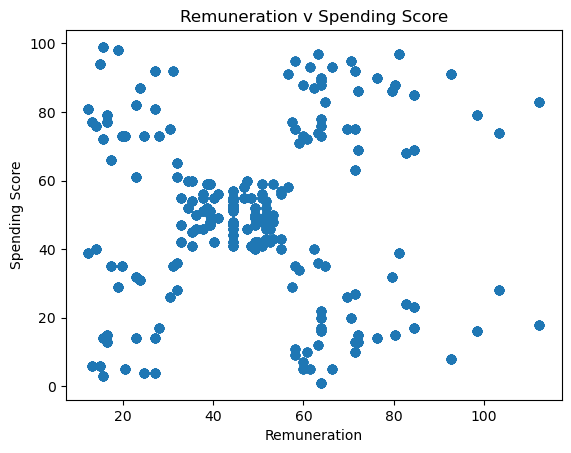

In [44]:


plt.scatter(x_rem, y) 
plt.title('Remuneration v Spending Score')
plt.xlabel('Remuneration')
plt.ylabel('Spending Score')


##### Loyalty Points v Spending Score


In [39]:
x_lp = trc['loyalty_points'].values.reshape(-1, 1)  
y = trc['spending_score'].values.reshape(-1, 1)  

lr_lp = LinearRegression()
lr_lp.fit(x_lp,y)
print("Intercept value: ", lr_lp.intercept_) 

print("Coefficient value: ", lr_lp.coef_)

Intercept value:  [28.42603349]
Coefficient value:  [[0.01367144]]


Text(0, 0.5, 'Spending Score')

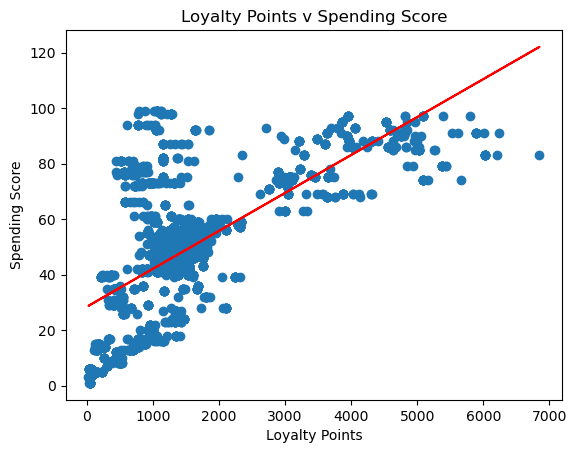

In [40]:
y_pred = lr_lp.intercept_ + lr_lp.coef_ * x_lp
plt.plot(x_lp, y_pred, color='red') 
plt.scatter(x_lp, y) 
plt.title('Loyalty Points v Spending Score')
plt.xlabel('Loyalty Points')
plt.ylabel('Spending Score')

In [59]:
# Calculate R-squared value
r_squared = lr_lp.score(x_lp, y)

# Cross-validation
cv_scores = cross_val_score(lr_lp, x_lp, y, cv=5)

print("R-squared value:", r_squared)
print("Cross-validation scores:", cv_scores)

R-squared value: 0.4306071092097401
Cross-validation scores: [0.49425494 0.49425494 0.49425494 0.54075523 0.26205079]


#### Remuneration vs Loyalty Points

In [54]:
x_lp = trc['loyalty_points'].values.reshape(-1, 1)  
y_rem = trc['remuneration'].values.reshape(-1, 1)  

rem_lp = LinearRegression()
rem_lp.fit(x_lp,y_rem)
print("Intercept value: ", rem_lp.intercept_) 

print("Coefficient value: ", rem_lp.coef_)

Intercept value:  [30.56055489]
Coefficient value:  [[0.01110149]]


Text(0, 0.5, 'Remuneration')

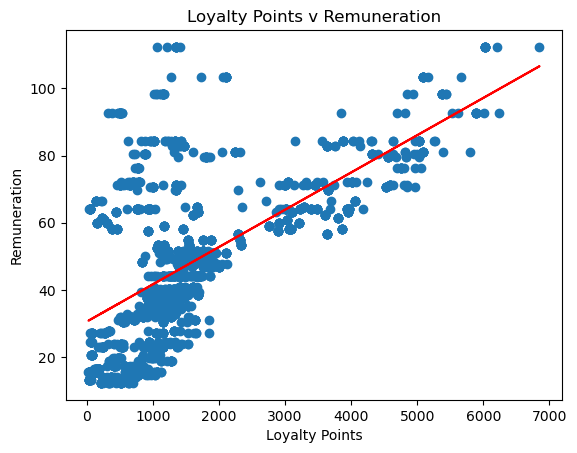

In [55]:
y_pred = rem_lp.intercept_ + rem_lp.coef_ * x_lp
plt.plot(x_lp, y_pred, color='red') 
plt.scatter(x_lp, y_rem) 
plt.title('Loyalty Points v Remuneration')
plt.xlabel('Loyalty Points')
plt.ylabel('Remuneration')

(array([258., 396., 720., 249.,  69., 127., 115.,  24.,  32.,  10.]),
 array([-27.50303464, -17.75487496,  -8.00671528,   1.7414444 ,
         11.48960408,  21.23776376,  30.98592344,  40.73408312,
         50.48224279,  60.23040247,  69.97856215]),
 <BarContainer object of 10 artists>)

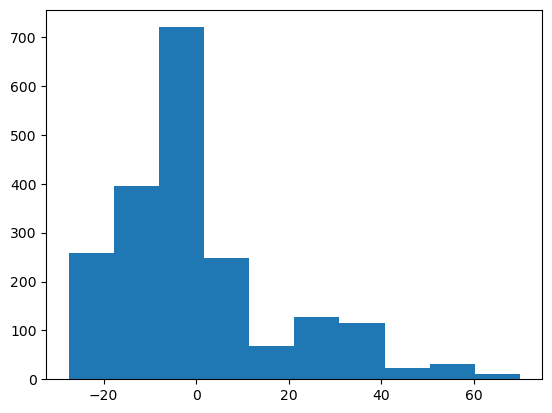

In [56]:
# Residual analysis
residuals = y_rem - rem_lp.predict(x_lp)
plt.hist(residuals)

In [58]:
# Calculate R-squared value
r_squared2 = rem_lp.score(x_lp, y_rem)

# Cross-validation
cv_scores2 = cross_val_score(rem_lp, x_lp, y_rem, cv=5)

print("R-squared value:", r_squared2)
print("Cross-validation scores:", cv_scores2)


R-squared value: 0.3795357732793636
Cross-validation scores: [0.35345079 0.35345079 0.35345079 0.25175096 0.33845496]
